# Домашнее Задание к Уроку №7


## Задание 1


In [157]:
#Способ с использованием intercept
import numpy as np

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks))/(np.mean(zp**2)-pow(np.mean(zp),2))
b = round(b, 2)
a = np.mean(ks) - b * np.mean(zp)
a = round(a, 2)
print("Формула математической модели примет вид у = {} + {} * x".format(a,b))


Формула математической модели примет вид у = 444.23 + 2.62 * x


In [158]:
#Способ без использования intercept
zp_1 = zp.reshape(10, 1)
ks_1 = ks.reshape(10,1)
zp_1 = np.hstack([np.ones((10,1)),zp_1])
b = np.dot(np.linalg.inv(np.dot(zp_1.T, zp_1)),zp_1.T)@ks_1
a = float(b[0])
b = float(b[1])
print("Формула математической модели примет вид у = {} + {}  * x".format(round(a,2),round(b,2)))


Формула математической модели примет вид у = 444.18 + 2.62  * x


## Задание 2


In [185]:
#Способ без использования intercept
def mse_1 (n, b1, x, y):
    '''
    Вычисление Среднее квадратичной ошибки
    Принимает количество парных измерений, массивы с данными: коэффициенты регрессии, признак, следствие 
    '''
    return np.sum((b1*x-y)**2)/n

alpha = 1/100000  # скорость обучения
b1 =0.1 # начальное значение коэффициента регрессии
n = len(zp)
for i in range (1000):
    b1 -= alpha * 2 * np.sum((b1*zp - ks)*zp)/n
    if i%100 == 0:
       print("Итерация {i}, значение коэффициента регрессии {b}, Средняя квадратичная ошибка {error}".format(i=i, b = b1,error =  mse_1(n, b1, zp, ks)))



Итерация 0, значение коэффициента регрессии 1.6952808000000001, Средняя квадратичная ошибка 298904.5992334053
Итерация 100, значение коэффициента регрессии 5.889820420132646, Средняя квадратичная ошибка 56516.85841571941
Итерация 200, значение коэффициента регрессии 5.889820420132688, Средняя квадратичная ошибка 56516.8584157194
Итерация 300, значение коэффициента регрессии 5.889820420132688, Средняя квадратичная ошибка 56516.8584157194
Итерация 400, значение коэффициента регрессии 5.889820420132688, Средняя квадратичная ошибка 56516.8584157194
Итерация 500, значение коэффициента регрессии 5.889820420132688, Средняя квадратичная ошибка 56516.8584157194
Итерация 600, значение коэффициента регрессии 5.889820420132688, Средняя квадратичная ошибка 56516.8584157194
Итерация 700, значение коэффициента регрессии 5.889820420132688, Средняя квадратичная ошибка 56516.8584157194
Итерация 800, значение коэффициента регрессии 5.889820420132688, Средняя квадратичная ошибка 56516.8584157194
Итерация 

# Задание №3

In [228]:
#Способ c использования intercept
def mse_2 (n, b0, b1, x, y):
    '''
    Вычисление Среднее квадратичной ошибки
    Принимает количество парных измерений, массивы с данными: коэффициенты регрессии, признак, следствие 
    '''
    return np.sum((b0 + b1*x-y)**2)/n

alpha = 1/100000 # скорость обучения
b0 = 401 # берем значение У при наименьшем Х (ближе к ОУ)
b1 =0.1 # начальное значение коэффициента регрессии b1
n = len(zp)
for i in range (100000):
    b1 -= alpha * 2 * np.sum((b0 + b1*zp - ks)*zp)/n  # производная по b1
    b0 -= alpha * 2 * np.sum((b0 + b1*zp - ks))/n       # производная по b0                 
    if i%10000 == 0:
       print("Итерация {i}, значение1 регрессии {a}, значение2 {b} , ошибка {error}".format(i=i,a=b0, b = b1,error =  mse_2(n, b0, b1, zp, ks)))


Итерация 0, значение1 регрессии 401.0043891969216, значение2 0.8820528000000001 , ошибка 65193.08055293306
Итерация 10000, значение1 регрессии 403.15039591406196, значение2 2.922515457527152 , ошибка 6897.385911240033
Итерация 20000, значение1 регрессии 405.1798267172739, значение2 2.9075779495485077 , ошибка 6856.189672247119
Итерация 30000, значение1 регрессии 407.10887013513184, значение2 2.8933793371100833 , ошибка 6818.968240172682
Итерация 40000, значение1 регрессии 408.94249190833426, значение2 2.87988307016485 , ошибка 6785.338106948427
Итерация 50000, значение1 регрессии 410.685412143329, значение2 2.867054406642462 , ошибка 6754.952767168327
Итерация 60000, значение1 регрессии 412.34211746279385, значение2 2.8548603230163523 , ошибка 6727.499147897953
Итерация 70000, значение1 регрессии 413.9168725550991, значение2 2.84326942929458 , ошибка 6702.694382952201
Итерация 80000, значение1 регрессии 415.41373115246563, значение2 2.832251888215732 , ошибка 6680.28289840603
Итерация 

Text(0, 0.5, 'Кредитный рейтинг')

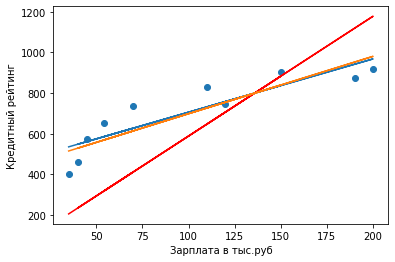

In [224]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(zp,ks)
plt.plot(zp, 444.18 + 2.62  *zp) # ФОРМУЛА модели по регрессионному анализу
plt.plot(zp, 5.89  *zp, color = 'red') # фОРМУЛА модели вычисленная по градиентному спуску без использования интерсепта
plt.plot(zp, 416.84+2.82*zp) # # фОРМУЛА модели вычисленная по градиентному спуску c использованием интерсепта
plt.xlabel('Зарплата в тыс.руб')
plt.ylabel('Кредитный рейтинг')